![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex


In [10]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [11]:
penguins_df = pd.get_dummies(data=penguins_df, columns=['sex'], dtype=int)

In [12]:
num_cols = penguins_df.select_dtypes(include=['number']).columns
penguins = penguins_df.copy()

scaler = StandardScaler()
penguins[num_cols] = scaler.fit_transform(penguins_df[num_cols])

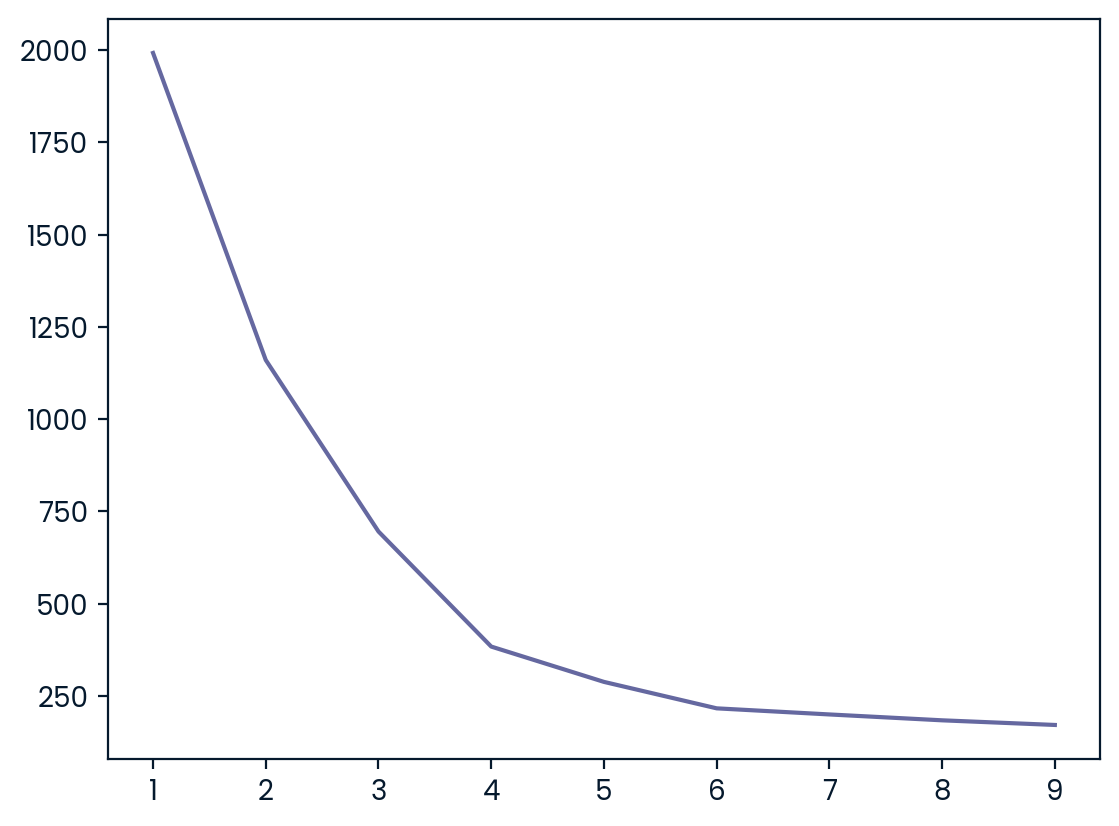

In [13]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(penguins[num_cols])  # Fit on the scaled data
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)

       culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
label                                     ...                      
0             40.217757        17.611215  ...    1.000000  0.000000
1             47.568067        14.996639  ...    0.487395  0.512605
2             43.878302        19.111321  ...    0.000000  1.000000

[3 rows x 6 columns]


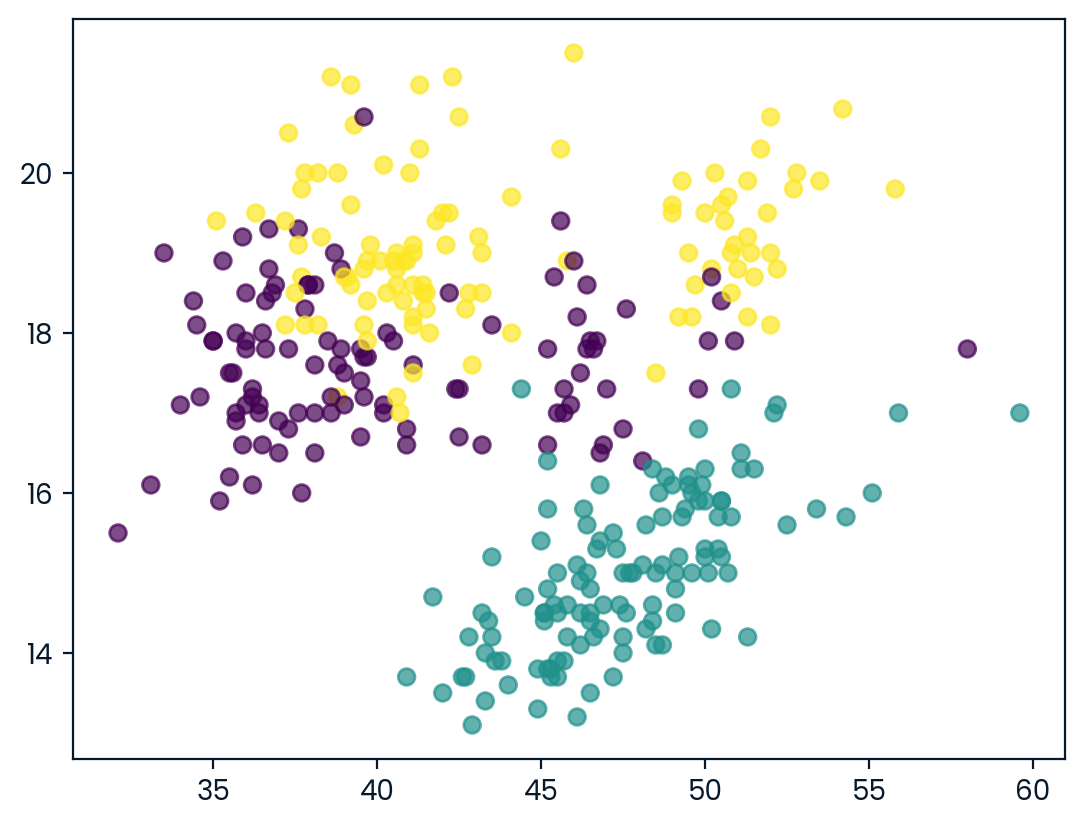

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
penguins['Cluster'] = kmeans.fit_predict(penguins[num_cols])
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'], c=penguins['Cluster'], cmap='viridis', alpha=0.7)

penguins_df['label'] = kmeans.labels_
stat_penguins = penguins_df.groupby('label').mean()
print(stat_penguins)